<a href="https://colab.research.google.com/github/AnthonyRom12/MNIST_Keras/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** Supervised Training **
**CNN **

## Loading data

In [4]:
from keras.datasets import mnist

(training_dataset_x, training_dataset_y), (test_dataset_x, test_dataset_y) = mnist.load_data()

training_dataset_x = training_dataset_x.reshape(-1, 28, 28, 1)
test_dataset_x = test_dataset_x.reshape(-1, 28, 28, 1)

training_dataset_x = training_dataset_x.astype('float32')
test_dataset_x = test_dataset_x.astype('float32')

## Min-Max Scaler

In [5]:
training_dataset_x /= 255
test_dataset_x /= 255

## One-Hot Encoding


In [6]:
from keras.utils import to_categorical

training_dataset_y = to_categorical(training_dataset_y)
test_dataset_y = to_categorical(test_dataset_y)


## Model

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu', name='Convolution-1'))
model.add(MaxPooling2D(name='MaxPooling2D-1'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', name='Convolution-2'))
model.add(MaxPooling2D(name='MaxPooling2D-2'))
model.add(Flatten())
model.add(Dense(128, activation='relu', name='Hidden-1'))
model.add(Dense(128, activation='relu', name='Hidden-2'))
model.add(Dense(10, activation='softmax', name='Output'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Convolution-1 (Conv2D)      (None, 26, 26, 32)        320       
                                                                 
 MaxPooling2D-1 (MaxPooling  (None, 13, 13, 32)        0         
 2D)                                                             
                                                                 
 Convolution-2 (Conv2D)      (None, 11, 11, 64)        18496     
                                                                 
 MaxPooling2D-2 (MaxPooling  (None, 5, 5, 64)          0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 Hidden-1 (Dense)            (None, 128)               2

## Training

In [8]:
EPOCHS = 5
BATCH_SIZE = 64
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
%time hist = model.fit(training_dataset_x, training_dataset_y, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split= 0.2)


Epoch 1/5
750/750 [==============================] - 45s 58ms/step - loss: 0.2004 - accuracy: 0.9387 - val_loss: 0.0709 - val_accuracy: 0.9790
Epoch 2/5
750/750 [==============================] - 62s 83ms/step - loss: 0.0542 - accuracy: 0.9832 - val_loss: 0.0506 - val_accuracy: 0.9845
Epoch 3/5
750/750 [==============================] - 52s 70ms/step - loss: 0.0383 - accuracy: 0.9876 - val_loss: 0.0479 - val_accuracy: 0.9852
Epoch 4/5
750/750 [==============================] - 44s 59ms/step - loss: 0.0276 - accuracy: 0.9912 - val_loss: 0.0400 - val_accuracy: 0.9887
Epoch 5/5
750/750 [==============================] - 43s 57ms/step - loss: 0.0213 - accuracy: 0.9932 - val_loss: 0.0483 - val_accuracy: 0.9872
CPU times: user 5min 19s, sys: 5.9 s, total: 5min 25s
Wall time: 4min 23s


## Evalution

In [9]:
loss, accuracy = model.evaluate(test_dataset_x, test_dataset_y)
print('loss = {}, accuracy = {}'.format(loss, accuracy))

313/313 [==============================] - 3s 9ms/step - loss: 0.0436 - accuracy: 0.9862
loss = 0.043602291494607925, accuracy = 0.9861999750137329


## Visualization

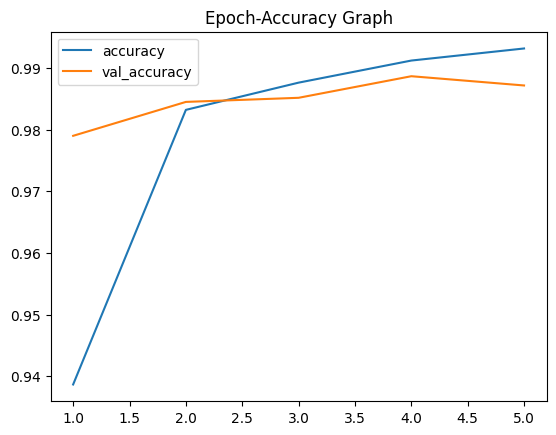

In [10]:
import matplotlib.pyplot as plt

plt.title('Epoch-Accuracy Graph')
plt.xlabel = 'Epochs'
plt.ylabel = 'Loss'
plt.plot(range(1, len(hist.epoch) + 1), hist.history['accuracy'])
plt.plot(range(1, len(hist.epoch) + 1), hist.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()